In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df['date']=pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [5]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,1461,NaN,NaN,NaN,2013-12-31 00:00:00,2012-01-01 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,NaN
precipitation,1461.0,NaN,NaN,NaN,3.029432,0.0,0.0,0.0,2.8,55.9,6.680194
temp_max,1461.0,NaN,NaN,NaN,16.439083,-1.6,10.6,15.6,22.2,35.6,7.349758
temp_min,1461.0,NaN,NaN,NaN,8.234771,-7.1,4.4,8.3,12.2,18.3,5.023004
wind,1461.0,NaN,NaN,NaN,3.241136,0.4,2.2,3.0,4.0,9.5,1.437825
weather,1461,5,rain,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(f'Max Temp: {df['temp_max'].max()}')
print(f'Min Temp: {df['temp_max'].min()}')

Max Temp: 35.6
Min Temp: -1.6


In [8]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

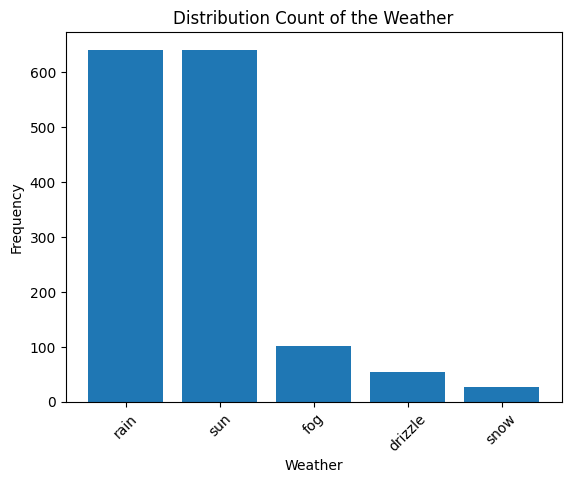

In [9]:
dw=df['weather'].value_counts()
plt.bar(dw.index, dw.values)
plt.title('Distribution Count of the Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [10]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

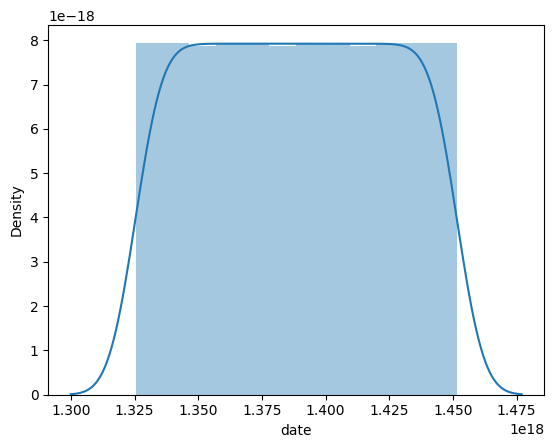

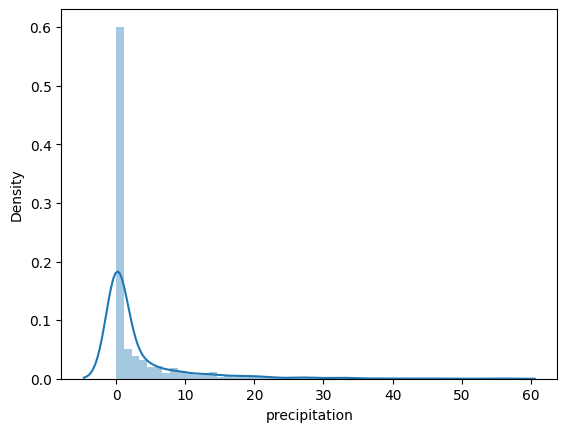

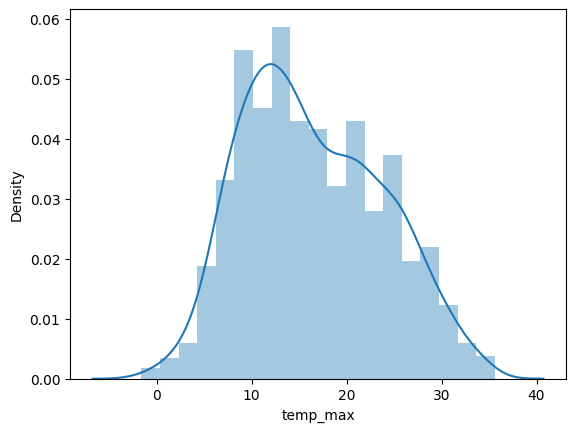

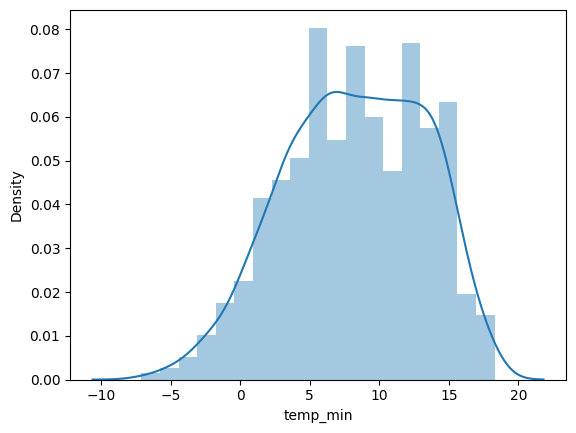

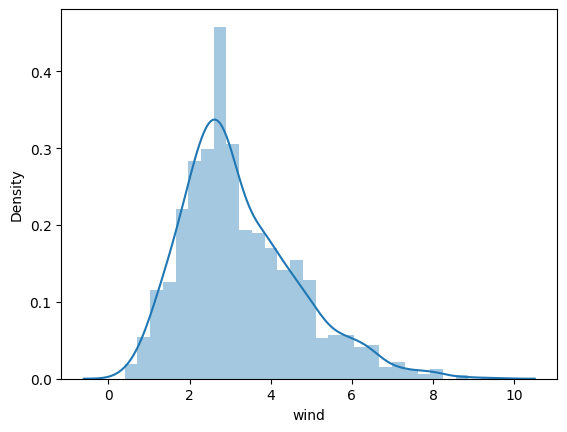

In [11]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

In [12]:
df_d=pd.get_dummies(df['weather'], prefix='weather', dtype=int)
df_encoded=pd.concat([df, df_d], axis=1)
df_encoded=df_encoded.drop('weather', axis=1)
df_encoded.head()

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,0,0,1,0,0
2,2012-01-03,0.8,11.7,7.2,2.3,0,0,1,0,0
3,2012-01-04,20.3,12.2,5.6,4.7,0,0,1,0,0
4,2012-01-05,1.3,8.9,2.8,6.1,0,0,1,0,0


In [13]:
x=df_encoded.drop(columns={'date','temp_max'}, axis=1)
y=df_encoded['temp_max']

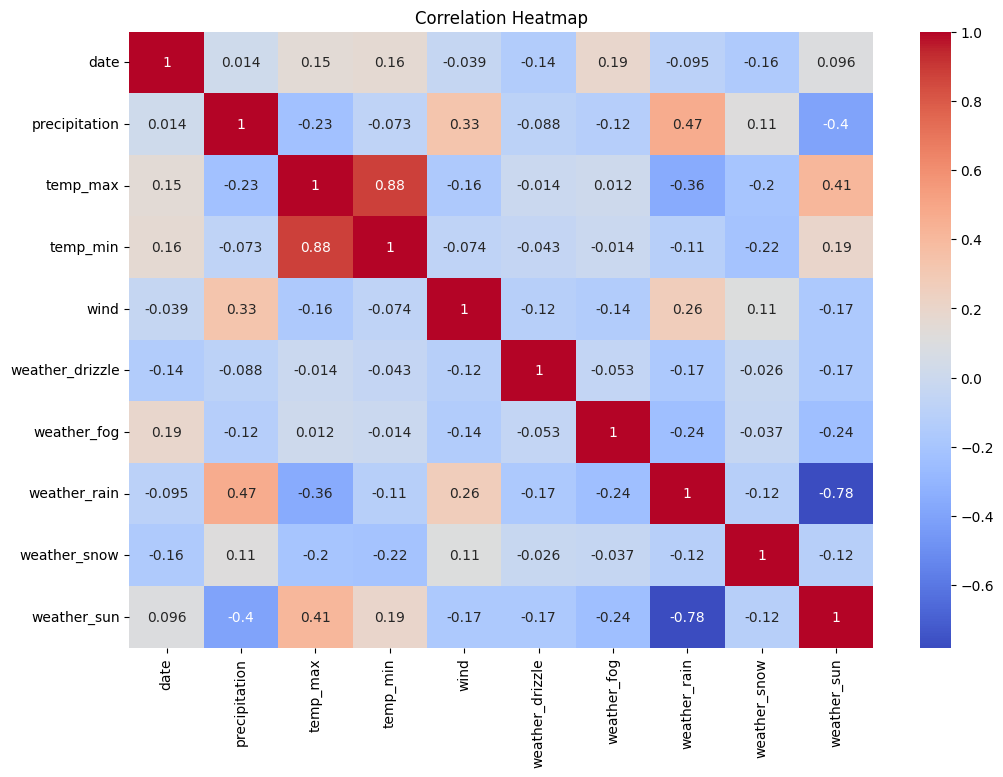

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)